In [1]:
# modules
import numpy as np
import pandas as pd
df=pd.read_csv('LEC_SummerPlayoffs_2024.csv')

df.head()

,Player,Role,Team,Opponent_Team,Opponent_Player,Date,Round,Day,Patch,Stage,...,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,Irrelevant,TOP,SK,TH,Wunder,7/12/2024,1,1,v14.13,Summer_Playoffs_24,...,9432,0,17,361,13153,0,4,16,50,50
1,Isma,JUNGLE,SK,TH,Jankos,7/12/2024,1,1,v14.13,Summer_Playoffs_24,...,15538,0,8,204,27102,0,5,19,0,0
2,Nisqy,MID,SK,TH,Zwyroo,7/12/2024,1,1,v14.13,Summer_Playoffs_24,...,7856,0,4,144,14367,36,8,24,0,100
3,Rahel,ADCARRY,SK,TH,Flakked,7/12/2024,1,1,v14.13,Summer_Playoffs_24,...,4962,0,2,116,8087,0,4,19,0,0
4,Luon,SUPPORT,SK,TH,Trymbi,7/12/2024,1,1,v14.13,Summer_Playoffs_24,...,5672,0,13,37,5643,10,14,25,0,0


In [2]:
# features check
df.columns

Index(['Player', 'Role', 'Team', 'Opponent_Team', 'Opponent_Player', 'Date',
       'Round', 'Day', 'Patch', 'Stage', 'No_Game', 'all_Games', 'Format',
       'Game_of_day', 'Side', 'Time', 'Ban', 'Ban_Opponent', 'Pick',
       'Pick_Opponent', 'Champion', 'Champion_Opponent', 'Outcome',
       'Kills_Team', 'Turrets_Team', 'Dragon_Team', 'Baron_Team', 'Level',
       'Kills', 'Deaths', 'Assists', 'KDA', 'CS', 'CS in Team's Jungle',
       'CS in Enemy Jungle', 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score',
       'Wards placed', 'Wards destroyed', 'Control Wards Purchased',
       'Detector Wards Placed', 'VSPM', 'WPM', 'VWPM', 'WCPM', 'VS%',
       'Total damage to Champion', 'Physical Damage', 'Magic Damage',
       'True Damage', 'DPM', 'DMG%', 'K+A Per Minute', 'KP%', 'Solo kills',
       'Double kills', 'Triple kills', 'Quadra kills', 'Penta kills', 'GD@15',
       'CSD@15', 'XPD@15', 'LVLD@15', 'Objectives Stolen',
       'Damage dealt to turrets', 'Damage dealt to buildings', 

In [3]:
# 因為資料集本身是以選手作為登入資料，一場比賽紅藍雙方共有10位選手
# 以10場做為一個分界點 進行場次的標記與統計時間
df['Games'] = df.index // 10 + 1
df.tail()

,Player,Role,Team,Opponent_Team,Opponent_Player,Date,Round,Day,Patch,Stage,...,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost,Games
415,Brokenblade,TOP,G2,FNC,Oscarinin,7/28/2024,FINALS,9,v14.13,Summer_Playoffs_24,...,0,32,497,33424,42,5,21,100,0,42
416,Yike,JUNGLE,G2,FNC,Razork,7/28/2024,FINALS,9,v14.13,Summer_Playoffs_24,...,0,32,594,14611,96,4,18,0,0,42
417,Caps,MID,G2,FNC,Humanoid,7/28/2024,FINALS,9,v14.13,Summer_Playoffs_24,...,0,2,58,22618,101,4,23,400,0,42
418,Hans_Sama,ADCARRY,G2,FNC,Noah,7/28/2024,FINALS,9,v14.13,Summer_Playoffs_24,...,0,2,72,11915,14,3,21,1100,0,42
419,Mikyx,SUPPORT,G2,FNC,Jun,7/28/2024,FINALS,9,v14.13,Summer_Playoffs_24,...,0,35,151,23562,68,19,32,0,0,42


In [4]:
# 分組後0場時間會是相同的，取出其中一做代表
df0=df.groupby('Games')['Time'].first()
df0.head()

Games
1    0:26:40
2    0:31:30
3    0:36:00
4    0:38:00
5    0:42:39
Name: Time, dtype: object

In [5]:
# 轉換時間格式以利計算
df0=pd.to_timedelta(df0)
max_time=df0.max()
min_time=df0.min()
avg_time=df0.mean()

print('平均遊戲時長', avg_time)
print('最長遊戲時間', max_time)
print('最短遊戲時間', min_time)

平均遊戲時長 0 days 00:33:36.500000
最長遊戲時間 0 days 00:47:30
最短遊戲時間 0 days 00:24:42


In [6]:
# 時間建立range 必須透過time delta進行轉換
dates = pd.date_range('2024-08-27 00:24:00', '2024-08-27 00:48:00', freq='1min')
# 進行格式轉換 必須以相減轉成time delta
base_time=np.datetime64('2024-08-27 00:00:00')
new_dates=[]
for d in dates:
    new_dates.append(d-base_time)
time_groups = pd.cut(df0, bins=new_dates, right=True, include_lowest=True)
time_counts=time_groups.value_counts().sort_index()

# 整理時間內容
# 相減後會多一個日期 這裡以字串刪除
new_index=[]
for d in time_counts.index:
    d=str(d).split(" ")
    interval=d[2][3:-1]+"~"+d[5][3:-1]
    new_index.append(interval)
# 設定成新的index
time_counts.index=new_index

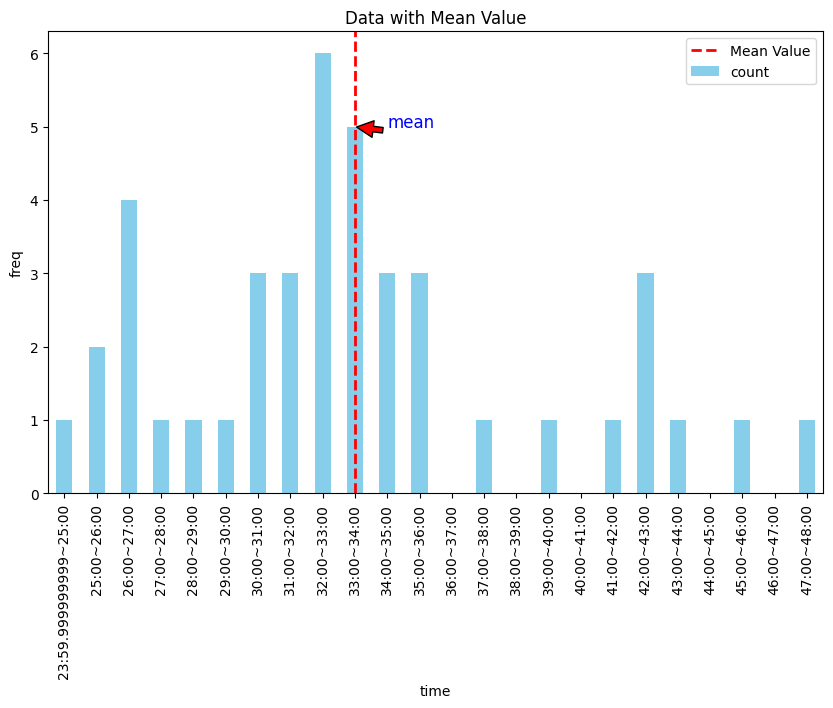

In [7]:
import matplotlib.pyplot as plt

# 新增平均數
avg_area=pd.cut([avg_time],new_dates, right=True, include_lowest=True)
# belong area
mean_belong=avg_area.codes[0]

# matplotlib繪圖設定
plt.figure(figsize=(10,6))
time_counts.plot(kind='bar', color='skyblue')
plt.title('Game Time Frequency')
plt.xlabel('time')
plt.ylabel('freq')

# 多顯示平均時長與格式
plt.axvline(x=9, color='red', linestyle='--', linewidth=2, label='Mean Value')
plt.annotate('mean', xy=(9,5), xytext=(10,5),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='blue')

plt.title('Data with Mean Value')
plt.legend()

plt.show()

In [8]:
# 紅藍方勝率
# 處理遊戲場次 
games=len(df)/10
#Side Outcome
red_win=len(df[(df['Side'] =='Red') & (df['Outcome']=='Win')])
red_winrate=red_win / 5 / games #每場比賽有5個row顯示結果，合併計算
print('red side: ', round(red_winrate,2))
#Side Outcome
blue_win=len(df[(df['Side'] =='Blue') & (df['Outcome']=='Win')])
blue_winrate=blue_win / 5 / games
print('blue side: ', round(blue_winrate,2))

red side:  0.43
blue side:  0.57


In [9]:
# 隊伍前10大最愛用的角色 與選擇率最高的角色
top10_champs=df['Champion'].value_counts()[0:10]
print(top10_champs/games, "\n")

# 出現超過10場腳色的勝率統計
for i in list(df['Champion'].unique()):
    win_game=len(df[(df['Champion'] == i) & (df['Outcome']=='Win')])
    all_game=len(df[(df['Champion'] == i)])
    if all_game <= 10:
        continue
    print(i,'\n win rate: ',round(win_game / all_game,2), ' in ', all_game,' games')

Champion
Corki       0.523810
Sejuani     0.523810
Kaisa       0.452381
Rell        0.428571
Renekton    0.428571
Lucian      0.404762
Zeri        0.380952
Zyra        0.357143
Ezreal      0.357143
Taliyah     0.333333
Name: count, dtype: float64 

Tristana 
 win rate:  0.64  in  14  games
Zeri 
 win rate:  0.38  in  16  games
Rell 
 win rate:  0.61  in  18  games
Leona 
 win rate:  0.38  in  13  games
Taliyah 
 win rate:  0.21  in  14  games
Kaisa 
 win rate:  0.58  in  19  games
Corki 
 win rate:  0.59  in  22  games
Nautilus 
 win rate:  0.55  in  11  games
Zyra 
 win rate:  0.6  in  15  games
Renekton 
 win rate:  0.39  in  18  games
Rakan 
 win rate:  0.33  in  12  games
Sejuani 
 win rate:  0.55  in  22  games
Ornn 
 win rate:  0.69  in  13  games
Alistar 
 win rate:  0.46  in  13  games
Ezreal 
 win rate:  0.47  in  15  games
Lucian 
 win rate:  0.35  in  17  games
Brand 
 win rate:  0.45  in  11  games


In [10]:
# 隊伍集殺統計
ks=df['Kills'].groupby(df['Team']).sum()
print(ks)

# 所有場次當中的平均集殺人數
all_kill=sum(ks)/games
print('average_kill in 1 game:', round(all_kill, 2))
print('average kill on Blue/Red side in 1 game:', round(all_kill / 2, 2))

# 各隊伍平均集殺人數
avgkill_by_team=ks / (df['Team'].value_counts()/5)
print(round(avgkill_by_team,2))

Team
BDS    244
FNC    236
G2     286
GX     112
KC     146
MDK     71
SK      75
TH      46
Name: Kills, dtype: int64
average_kill in 1 game: 28.95
average kill on Blue/Red side in 1 game: 14.48
Team
BDS    14.35
FNC    18.15
G2     17.88
GX     12.44
KC     12.17
MDK    14.20
SK     10.71
TH      9.20
dtype: float64


In [11]:
# 隊伍推塔狀況
team_in_turrent=df['Turrets_Team'].groupby(df['Team']).sum()/5
team_in_game=df['Team'].value_counts()/5

# 隊伍平均每場次推塔
avg_turrent=round(team_in_turrent/team_in_game,1)
print(avg_turrent)
print(avg_turrent.mean())

Team
BDS    6.8
FNC    7.2
G2     8.6
GX     5.8
KC     5.1
MDK    6.4
SK     5.9
TH     4.2
dtype: float64
6.25


In [12]:
# 中立物件
# 每場比賽陣亡的巴龍、小龍數量(兩隊共同)
dg=df[['Dragon_Team','Baron_Team']].groupby(df['Team']).sum()/5
all_dg=dg.sum()
print(round(all_dg/games, 2))
team_game=df['Team'].value_counts()/5

# 巴龍
baron= round(dg['Baron_Team'] / team_game,1)
print('Baron killed by team:\n',baron)
# 小龍
dragon= round(dg['Dragon_Team'] / team_game,1)
print('Dragon killed by team:\n',dragon)

Dragon_Team    4.69
Baron_Team     1.69
dtype: float64
Baron killed by team:
 Team
BDS    0.9
FNC    0.7
G2     1.2
GX     1.1
KC     0.7
MDK    0.8
SK     0.6
TH     0.2
dtype: float64
Dragon killed by team:
 Team
BDS    2.4
FNC    2.2
G2     2.7
GX     2.6
KC     2.0
MDK    2.2
SK     2.1
TH     2.4
dtype: float64


In [13]:
# 資料清理
# 選定feature
# 以隊伍進行預測，必須要綁定五筆資料一組
df_x=df[[
    'Side','Time','Turrets_Team',
    'Dragon_Team','Baron_Team',
    'CS','Golds','Vision Score','GD@15',
    'Objectives Stolen'
]]

# 將五位選手資料依照場次合併 
g_num=[ i //5 for i in range(len(df_x))]
df_x=df_x.copy()
df_x.loc[:, 'Games']=g_num


In [14]:
# 替換文字頻率為數字
# Side
side_dict={'Blue':0 ,'Red':1}
df_x['Side']=df_x['Side'].map(side_dict)

# 其他資料相加
df_x=df_x[[
    'Side','Time','Turrets_Team',
    'Dragon_Team','Baron_Team',
    'CS','Golds','Vision Score','GD@15',
    'Objectives Stolen'
]].groupby(df_x['Games']).sum()

In [15]:
# 處理時間由文字 統一換成秒數
def time_cacu(x):
    timecacu = x[2:7].split(":")
    spend=int(timecacu[0])*60+int(timecacu[1])
    return spend
df_x['Time']=df_x['Time'].apply(time_cacu)
df_x.head()

,Side,Time,Turrets_Team,Dragon_Team,Baron_Team,CS,Golds,Vision Score,GD@15,Objectives Stolen
Games,,,,,,,,,,
0,0,1600,45,15,5,1047,53902,215,2138,0
1,5,1600,0,5,0,957,44209,267,-2138,0
2,0,1890,20,15,0,1046,52709,281,75,0
3,5,1890,45,10,10,1126,63526,260,-75,0
4,0,2160,25,5,0,1233,66570,310,242,0


In [16]:
# y也進行文字替換
df_y=df['Outcome']
result={
    'Win':1,
    'Loss':0
}
df_y=pd.DataFrame(df_y)
df_y['Outcome']=df_y['Outcome'].map(result)
# 決定勝場，只需僅保留5比比賽選手資料的一筆
df_y=df_y[df_y.index % 5 == 0]
df_y.head()

,Outcome
0,1
5,0
10,0
15,1
20,0


In [17]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=df_x.copy()
y=df_y.copy()
# 處理x
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled)
print(x_scaled.shape, y.shape)

(84, 10) (84, 1)


In [18]:
"""
scaler之後想說順手用相關係數檢查看看有沒有可能彼此之間相關很高的feature，其實蠻多的
但像是比賽用時、金錢等和很多的屬性都有很高的相關性 但他們都算是蠻主要的feature所以不予以刪除
比較有趣的是中立物件(巴龍、小龍)的集殺和推塔有高相關，推測可能是隊伍在掌控地圖資源之後比較容易進行中立物件的爭奪
"""
# 檢查相關係數
cor_matrix=x_scaled.corr()
names=[i for i in range(len(df_x.columns))]

features=list(df_x.columns)
f_dict=dict(zip(names, features))

# 相關係數檢驗
cor_list=set()
for index1,i in enumerate(list(cor_matrix.columns)):
    for index2,k in enumerate(cor_matrix[i]):
        if (k >= 0.5 or k <=-0.5) and (index1 != index2):
            new=sorted([f_dict[index1],f_dict[index2]])
            new=tuple(new)
            cor_list.add(new)
print(cor_list)

{('Baron_Team', 'Golds'), ('CS', 'Golds'), ('Golds', 'Turrets_Team'), ('CS', 'Time'), ('Dragon_Team', 'Turrets_Team'), ('Time', 'Vision Score'), ('Golds', 'Time'), ('Baron_Team', 'Turrets_Team'), ('CS', 'Vision Score'), ('Golds', 'Vision Score')}


In [19]:
# 邏輯回歸預測
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

labels=y #怕搞混這裡改叫做label
x_train, x_test, y_train, y_test=train_test_split(x_scaled,labels,test_size=0.2,random_state=101)

# 指定模型
model=LogisticRegression()
# train
model.fit(x_train, y_train)

C:\Users\william\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [20]:
# 評估後果
y_pred=model.predict(x_test)
# 測試預測成功
# confusion matrix 
"""
第一行 True Negative / False Negative
第二行 False Positive / True Positive
"""
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

# 成效評估
"""
precision => 精確度 結果中 真實label的比例
recall => 正確預測的機率 該類型被預測正確的比例
F1 => precision和recall的調和值
Support => 數量
Acuuracy on f1 -> 所有的預測準確率
"""
print('Classification report:\n', classification_report(y_test,y_pred))

Confusion Matrix:
 [[7 0]
 [1 9]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.90      0.95        10

    accuracy                           0.94        17
   macro avg       0.94      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



In [21]:
# 深度學習 library
from tensorflow import keras
# 線性推入model
from tensorflow.keras.models import Sequential
# 全連接層
from tensorflow.keras.layers import Dense
# 優化器
from tensorflow.keras.optimizers import Adam

def model_maker():
    model=Sequential()
    model.add(Dense(16, activation='relu', input_shape=(10,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model
dl_model=model_maker()
dl_model.summary()

C:\Users\william\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 設定loss和優化器
# 因應sample數量較小 採用adam進行優化
dl_model.compile(loss='binary_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [23]:
# 開始訓練
"""原本以50 epoch決定是否要往上加 後來發現有點over fitting
在batch size為2的時候 10次可能會最剛好
"""
history=dl_model.fit(x_train, y_train, batch_size=2, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5060 - loss: 0.8026 - val_accuracy: 0.4706 - val_loss: 0.7804
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4909 - loss: 0.6986 - val_accuracy: 0.4706 - val_loss: 0.6703
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6846 - loss: 0.5544 - val_accuracy: 0.6471 - val_loss: 0.5911
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8713 - loss: 0.4006 - val_accuracy: 0.6471 - val_loss: 0.5288
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7744 - loss: 0.4524 - val_accuracy: 0.8235 - val_loss: 0.4679
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9166 - loss: 0.3799 - val_accuracy: 0.8824 - val_loss: 0.4305
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9214 - loss: 0.3529 - val_accuracy: 0.8824 - val_loss: 0.4018
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.3494 - val_accuracy: 0.8824 - val_loss

In [24]:
# 測試模型效能
score=dl_model.evaluate(x_test, y_test, verbose=2)
print('test loss:', round(score[0],2))
print('準確率: ', round(score[1],2))

1/1 - 0s - 33ms/step - accuracy: 0.9412 - loss: 0.3272
test loss: 0.33
準確率:  0.94


In [25]:
# 深度學習模型輸出
dl_model.save('dl_on_lol(ac88).h5')

In [26]:
# 二元回歸模型輸出
import joblib
joblib.dump(model, 'reg_on_lol(ac94)')

['reg_on_lol(ac94)']